<a href="https://colab.research.google.com/github/Michael-OvO/urban-tree-detection/blob/main/Deep_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Urban Tree Crown Recognition from Aerial Images

Author: Michael.W
2023.5.16

## Install Dependencies

In [ ]:
pip install deepforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

## Initialize model

In [ ]:
from deepforest import main
m = main.deepforest()
m.use_release()

Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:00<00:00, 168MB/s]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop


NEON.pt: 129MB [00:01, 110MB/s]                           


Model was downloaded and saved to /usr/local/lib/python3.10/dist-packages/deepforest/data/NEON.pt
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


## File Upload
Upload your file 

In [25]:
from google.colab import files
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

Saving school_mid.jpeg to school_mid.jpeg


mkdir: cannot create directory ‘outputs/’: File exists


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

1956 predictions in overlapping windows, applying non-max supression
1179 predictions kept after non-max suppression


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/usr/local/lib/python3.10/dist-packages/deepforest/visualize.py:115: UserWarning: Input images must be channels last format [h, w, 3] not channels first [3, h, w], using np.rollaxis(image, 0, 3) to invert!
  warnings.warn("Input images must be channels last format [h, w, 3] not channels "
/usr/local/lib/python3.10/dist-packages/deepforest/visualize.py:123: UserWarning: No color was provided and the label column is not numeric. Using a single default color.
  warnings.warn("No color was provided and the label column is not numeric. "
/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=dr

Predicting: 0it [00:00, ?it/s]

1956 predictions in overlapping windows, applying non-max supression
1179 predictions kept after non-max suppression
Total area of boxes: 4596008.0
Percentage of image covered by boxes: 14.834376859135379%


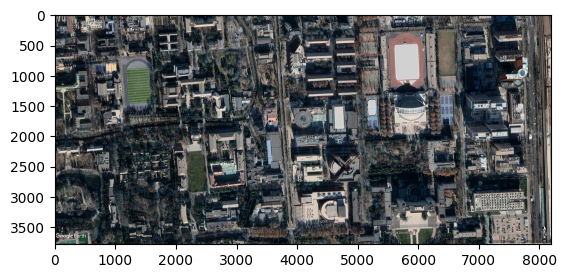

In [27]:
import cv2
#@title Prediction { display-mode: "both" }
patch_sz = 1000 #@param {type:"integer"}
output_name = "output"+image_name+".jpeg" 

%mkdir outputs/

from deepforest import get_data
import os
import matplotlib.pyplot as plt

raster_path = get_data("/content/"+image_name)

predicted_boxes = m.predict_tile(raster_path = raster_path,
                                        patch_size = patch_sz,
                                        patch_overlap = 0.25,return_plot= True, iou_threshold=0.05 )
plt.imshow(predicted_boxes)
plt.savefig("outputs/"+output_name,dpi=200)


predicted_boxes = m.predict_tile(raster_path = raster_path,
                                        patch_size = patch_sz,
                                        patch_overlap = 0.25,return_plot= False, iou_threshold=0.05 )

box_areas = (predicted_boxes['xmax'] - predicted_boxes['xmin']) * (predicted_boxes['ymax'] - predicted_boxes['ymin'])
total_area = box_areas.sum()
print(f"Total area of boxes: {total_area}")


# Load the image
img = cv2.imread(image_name)

# Get the dimensions of the image
height, width, _ = img.shape

# Calculate the total area of the image
total_image_area = width * height

coverage_percentage = total_area/total_image_area*100

print(f"Percentage of image covered by boxes: {coverage_percentage}%")

# Save & Download Results


In [ ]:
!zip -r outputs.zip outputs/
files.download('outputs.zip')

  adding: outputs/ (stored 0%)
  adding: outputs/output2.png (deflated 1%)
  adding: outputs/output3.png (deflated 1%)
  adding: outputs/output4.png (deflated 1%)
  adding: outputs/output5.png (deflated 0%)
  adding: outputs/output1.png (deflated 1%)
